# Computational Physics Demo Project

# Applying Huygens' principle

## Introduction
Huygens' principle models a wavefront as a line of infinite point sources. The aim of this project is to demonstrate that Huygens' model does indeed work for a plane wave.

## First steps
Initially, we want to check that we can make a function to produce a matrix of points showing wave propagation from a number of sources on the y-axis of a plot.

The first step is to import the modules required and define the box used for the model.

In [1]:
# set-up the python programme
%matplotlib inline
from math import sqrt, sin, pi # import scientific functions
from numpy import empty
from pylab import imshow,gray,plot,show


# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
%config InlineBackend.figure_formats = {'svg',}
# This enables high resolution PNGs. SVG is preferred, but has problems
# rendering vertical and horizontal lines
# %config InlineBackend.figure_formats = {'png', 'retina'}

# define the box
wavelength = 5 # length of wavelength
side = 100     # length of side
points = 500   # points per side
spacing = side/points 

The next step is to define a function which will carry out the generation of the matrix of values. This function will require one argument, a list of the positions of sources on the y-axis.

The value of wave height is calculated using: $$ value = \sin\left(\frac{2\pi r}{\lambda}\right) $$

In [2]:
def generateGrid(sources):
    xi = empty([points,points],float) # create an empty grid to store the heights
    # loop through the grid, calculating the wave height.
    for i in range(points):
        y = spacing*i # this gives the y-coordinate for the grid
        for j in range(points):
            x = spacing*j # this gives the x-coordinate for the grid
            val = 0
            # here we assume superposition of the waves from each source
            for source in sources:
                r = sqrt(x**2+(y-source)**2)
                val += sin(2*pi*r/wavelength)
            xi[i,j] = val
    return xi

The generateGrid() function will now be tested for a single source halfway up the y-axis.

In [3]:
single = generateGrid([50]) # generate grid of values with one source at y=50

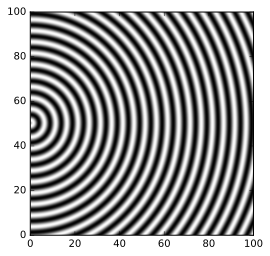

In [4]:
# Make the plot
def displayPlot(matrix):
    imshow(matrix,origin="lower",extent=[0,side,0,side])
    gray()
    show()
displayPlot(single)

Now the code is working the number of sources can be increased. To do this a function is made to enable a one line calculation for *N* sources.

In [5]:
def calcSources(N):
    sources = []
    for x in range(1,N+1):
        sources.append(x*side/(N+1)) # add sources to a list of sources
    return generateGrid(sources)
def displaySources(N):
    print("Number of sources = " + str(N))
    displayPlot(calcSources(N))

The displaySources() function is now tested and should produce the same output as above.

Number of sources = 1


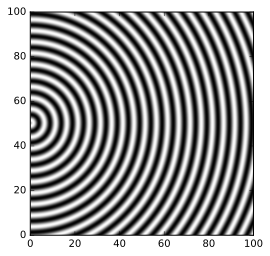

In [6]:
displaySources(1)

## Increasing the number of sources

The number of sources on the y-axis is now gradually increased in order to generate a plane wave.

Number of sources = 3


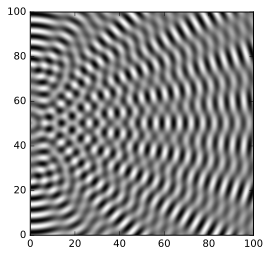

In [7]:
displaySources(3)

With three sources an interference pattern is generated.

Number of sources = 10


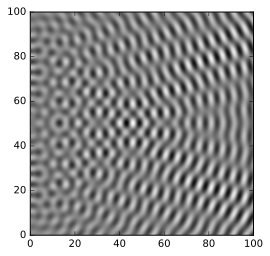

In [8]:
displaySources(10)

With ten sources the pattern is still messy.

Number of sources = 30


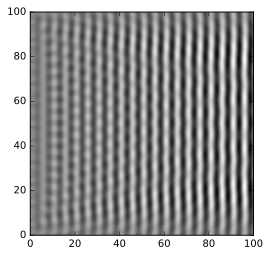

In [9]:
displaySources(30)

With thirty sources a plane wave is being recovered.

Number of sources = 50


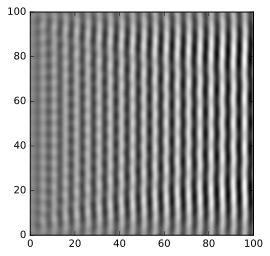

In [10]:
displaySources(50)

Fifty sources doesn't make much difference.

## Conclusion

The computer model above demonstrates Huygens princple for a plane wave. This model could be refined for speed and expanded to demonstrate different types of diffraction. It would be possible to test analytic solutions for regular diffraction and also model irregular diffraction patterns.